# Project: Investigate No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
What if it was possible to predict someone for a no-show, medical appointment? By analyzing around 100k medical appointments from Brazil in 2016, we can determine what factors influence patients to show up or not show up to their appointments. We will analyze 14 variables, where the variable headers are self-explanatory. The variable that we are most interested in is the No-show variable, where No means they did show up to an appointment and Yes means they did not show up.

In [342]:
# imported packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [343]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [344]:
df.shape

(110527, 14)

In [345]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [346]:
# check for any missing or null values in dataset 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [347]:
# check if there are duplicated rows
sum(df.duplicated())

0

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [349]:
# number of unique value
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Data Cleaning

In [350]:
# drop unusable columns
df.drop('AppointmentID', axis=1, inplace = True)

In [351]:
# Rename columns so that each column has same format
df.rename(columns={'PatientId':'Patient_id', 'ScheduledDay':'Scheduled_day',
                   'AppointmentDay':'Appointment_day', 'Neighbourhood':'Neighborhood', 'Hipertension':'Hypertension',
                   'Handcap':'Handicap','No-show':'No_show'}, inplace=True)
# confirm changes
df.head()

,Patient_id,Gender,Scheduled_day,Appointment_day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [352]:
# Query where the Age is -1.
df.query('Age == "-1"')

,Patient_id,Gender,Scheduled_day,Appointment_day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,4.659432e+14,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [353]:
# as there is only 1 row with -1 Age, I deleted it
df.drop(df.index[99832], inplace = True)

In [354]:
# Correct the format of date
df['Scheduled_day'] = pd.to_datetime(df['Scheduled_day'])
df['Appointment_day'] = pd.to_datetime(df['Appointment_day'])
df.info()

In [356]:
# Transform gender format to 0 and 1 for female and male
dummy = pd.get_dummies(df['Gender'])
df = pd.concat([df, dummy[['M']]], axis = 1)
df.drop('Gender', axis=1, inplace = True)
df.rename(columns={'M':'Male'}, inplace=True)
df.head()

,Patient_id,Scheduled_day,Appointment_day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Male
0,2.987250e+13,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1
2,4.262962e+12,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [357]:
# Transform no_show format to 0 and 1. No =0
dummy = pd.get_dummies(df['No_show'])
df = pd.concat([df, dummy[['Yes']]], axis = 1)
df.drop('No_show', axis=1, inplace = True)
df.rename(columns={'Yes':'No_show'}, inplace=True)
df.head()

,Patient_id,Scheduled_day,Appointment_day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Male,No_show
0,2.987250e+13,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,5.589978e+14,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,4.262962e+12,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,8.679512e+11,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,8.841186e+12,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   Patient_id       110526 non-null  float64            
 1   Scheduled_day    110526 non-null  datetime64[ns, UTC]
 2   Appointment_day  110526 non-null  datetime64[ns, UTC]
 3   Age              110526 non-null  int64              
 4   Neighborhood     110526 non-null  object             
 5   Scholarship      110526 non-null  int64              
 6   Hypertension     110526 non-null  int64              
 7   Diabetes         110526 non-null  int64              
 8   Alcoholism       110526 non-null  int64              
 9   Handicap         110526 non-null  int64              
 10  SMS_received     110526 non-null  int64              
 11  Male             110526 non-null  uint8              
 12  No_show          110526 non-null  uint8              
dtyp

<a id='eda'></a>
## Exploratory Data Analysis

### Which binary variables among scholarship, hypertension, diabetes, alcoholism, SMS received, gender are significant in predicting no-show?

In [359]:
# percentage of patient independant of show or no-show
binary_columns=['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'Male']
proportion_independant_of_show=round(df[binary_columns].apply(pd.Series.value_counts)/df.shape[0]*100,2)
proportion_independant_of_show


,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,Male
0,90.17,80.28,92.81,96.96,67.9,65.0
1,9.83,19.72,7.19,3.04,32.1,35.0


In [360]:
# percentage of patient not showing up
df_no_show = df.query('No_show ==1')
proportion_no_show=round(df_no_show[binary_columns].apply(pd.Series.value_counts)/df_no_show.shape[0]*100,2)
proportion_no_show

,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,Male
0,88.45,83.1,93.59,96.97,56.16,65.39
1,11.55,16.9,6.41,3.03,43.84,34.61


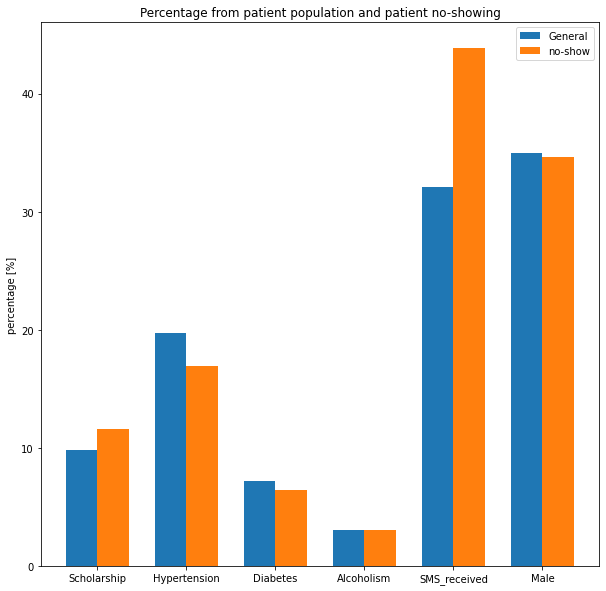

In [361]:
labels = binary_columns
proportion_independant_of_show 


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, proportion_independant_of_show.iloc[1], width, label='General')
rects2 = ax.bar(x + width/2, proportion_no_show.iloc[1], width, label='no-show')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('percentage [%]')
ax.set_title('Percentage from patient population and patient no-showing')
ax.set_xticks(x)
ax.set_xticklabels(labels)
fig.set_size_inches(10, 10)
ax.legend();

There is not indication that the alcoholism or the gender of the patient influence the showing up. There is a slight trend that indicates that patient with either scholarship, no hypertension or no diabetes are more likely to not show up. Unexpectedly, there is a clear trend that patient receiving an sms do not show up.

### What is the influence of continous variables, age and handicap on no-show?

34.31766656212196
37.790504154999034


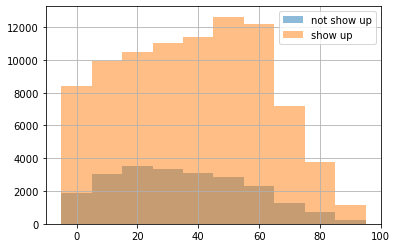

In [366]:
print(df.Age[no_show].mean())
print(df.Age[np.invert(no_show)].mean())
df.Age[no_show].hist(alpha=0.5, bins=np.arange(-5,105,10), label='not show up')
df.Age[np.invert(no_show)].hist(alpha=0.5, bins=np.arange(-5,105,10), label='show up')
plt.legend();

The elderly people tend to have a higher attend rate as the mode of the distribution is at 50 and the mean of 37.8 years old for the patient showing up, wheras a mode of 20 and a mean of 34.3 years old for the patient not showing up.

In [367]:
proportion_independant_of_show=round(df['Handicap'].value_counts()/df.shape[0]*100,2)
print(proportion_independant_of_show)
proportion_no_show=round(df_no_show['Handicap'].value_counts()/df_no_show.shape[0]*100,2)
proportion_no_show

0    97.97
1     1.85
2     0.17
3     0.01
4     0.00
Name: Handicap, dtype: float64


0    98.18
1     1.64
2     0.17
3     0.01
4     0.00
Name: Handicap, dtype: float64

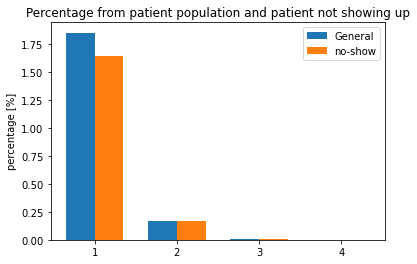

In [368]:
labels = np.arange(1,5)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, proportion_independant_of_show[1:5], width, label='General')
rects2 = ax.bar(x + width/2, proportion_no_show[1:5], width, label='no-show')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('percentage [%]')
ax.set_title('Percentage from patient population and patient not showing up')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

The proportion of people with an handicap is 2% so the represent only a small part of the patient population. Only a slight trend from the handicapped patient from category can be observed. It seems these patients tend attend more frequenctly their appointments.

### What is the influence of duration between scheduled and appointement time on no-show?

In [362]:
# Calcuate the duration between scheduled and appointement time
df.Appointment_day - df.Scheduled_day

0        -1 days +05:21:52
1        -1 days +07:51:33
2        -1 days +07:40:56
3        -1 days +06:30:29
4        -1 days +07:52:37
                ...       
110522    34 days 14:44:25
110523    34 days 16:32:27
110524    40 days 07:56:08
110525    40 days 08:50:37
110526    40 days 10:29:04
Length: 110526, dtype: timedelta64[ns]

In [363]:
# Appointment_day is rounded on day but not Scheduled_day
df['Duration']= df.Appointment_day - df.Scheduled_day.dt.floor("D")
df['Duration']= df.Duration.astype(int)/86400000000000
no_show = df.No_show == 1
print(df.Duration[no_show].mean())
print(df.Duration[np.invert(no_show)].mean())

15.83148886598862
8.754758692620767


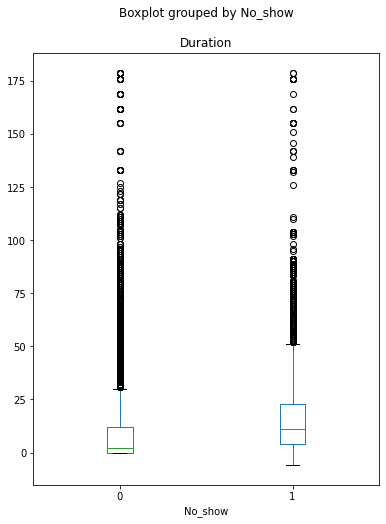

In [364]:
# box plot 0 = attended the appointment, 1 = not attended the appointment.
df.boxplot(column='Duration', by='No_show', figsize=(6,8),  grid=False);


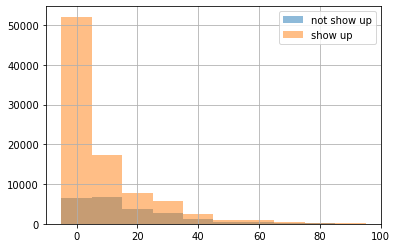

In [365]:
df.Duration[no_show].hist(alpha=0.5, bins=np.arange(-5,105,10), label='not show up')
df.Duration[np.invert(no_show)].hist(alpha=0.5, bins=np.arange(-5,105,10), label='show up')
plt.legend();

The longer is the duration between the scheduled and appointment time, higher is the likelihood that the patient not show up, however this trend seems to be mainly due to the fact that appointment scheduled on the same day, i.e. 0 day as a high attendance rate. The high attendance can be explained as the patient stay in the hospital and don't go back home or the patient came without an appointment in hospital.

<a id='conclusions'></a>
## Conclusions



To conclude, it seems that patient receiving an sms tend to more frequently not showing up. There are few slight trends which seems to be not significant: patient with either not handicapped, young, with scholarship, no hypertension or no diabetes are more likely to not show up.

There is not prior indication that gender or alcoholim is linked to not showing up.
<br><br>
It is also important to notice that appointment scheduled on the same day have higher showing up rate but not 100%. Did some patients run away from the waiting room?
